In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
import tensorflow as tf 
from tensorflow import keras

2023-05-05 18:51:56.955330: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 18:51:57.113299: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 18:51:57.114984: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 18:51:58.231156: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
htc = pd.read_csv('./htc_test.csv')

In [6]:
temp = pd.read_csv('./temp_test.csv')

In [28]:
x = temp.to_numpy()
y = htc.to_numpy()

In [29]:
x_train = x[:900000]
y_train = y[:900000]

In [30]:
x_train_unscaled = x_train.copy()

In [31]:
# x_train

In [32]:
x_valid = x[900000:910000]
y_valid = y[900000:910000]

In [33]:
x_test = x[910000:920000]
y_test = y[910000:920000]

In [34]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [35]:
x_train

array([[ 0.        ,  1.45409407,  1.36848733, ..., -0.72867322,
        -0.7301573 , -0.73159145],
       [ 0.        , -1.45918643, -1.3107759 , ..., -0.61347292,
        -0.61115896, -0.60890085],
       [ 0.        , -1.84191866, -1.80724928, ...,  2.00196496,
         1.9972822 ,  1.99258634],
       ...,
       [ 0.        , -0.61105765, -0.3715768 , ...,  2.28871353,
         2.29415488,  2.29953493],
       [ 0.        , -1.21884079, -0.80804036, ...,  1.62465891,
         1.62649095,  1.62826128],
       [ 0.        , -0.12235484, -1.00141229, ..., -1.41938763,
        -1.41388688, -1.40838305]])

In [36]:
y_train_log = np.log(y_train)
y_valid_log = np.log(y_valid)
y_test_log = np.log(y_test)

In [56]:
model = keras.models.Sequential([
    keras.layers.Input(shape=x_train.shape[1:]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(75, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(120)
])

In [57]:
model.compile(loss='mse', optimizer='adam', metrics=[
    keras.metrics.RootMeanSquaredError(),
    keras.metrics.MeanAbsolutePercentageError()
])

In [21]:
# model = keras.models.load_model('./MLP2.h5')

In [74]:
history = model.fit(x_train, y_train_log, epochs=10, validation_data=(x_valid, y_valid_log))

Epoch 1/10
28125/28125 [==============================] - 79s 3ms/step - loss: 0.0063 - root_mean_squared_error: 0.0792 - mean_absolute_percentage_error: 0.5259 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0794 - val_mean_absolute_percentage_error: 0.5196
Epoch 2/10
28125/28125 [==============================] - 78s 3ms/step - loss: 0.0062 - root_mean_squared_error: 0.0790 - mean_absolute_percentage_error: 0.5233 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0777 - val_mean_absolute_percentage_error: 0.5366
Epoch 3/10
28125/28125 [==============================] - 78s 3ms/step - loss: 0.0062 - root_mean_squared_error: 0.0786 - mean_absolute_percentage_error: 0.5195 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0792 - val_mean_absolute_percentage_error: 0.4965
Epoch 4/10
28125/28125 [==============================] - 78s 3ms/step - loss: 0.0061 - root_mean_squared_error: 0.0784 - mean_absolute_percentage_error: 0.5176 - val_loss: 0.0082 - val_root_mean_squared_error: 

In [75]:
model.evaluate(x_test, y_test_log)

313/313 [==============================] - 1s 2ms/step - loss: 0.0059 - root_mean_squared_error: 0.0770 - mean_absolute_percentage_error: 0.5506


[0.005922739394009113, 0.07695931941270828, 0.5506191849708557]

In [92]:
model.save('MLP5_log.h5')

1/1 [==============================] - 0s 21ms/step


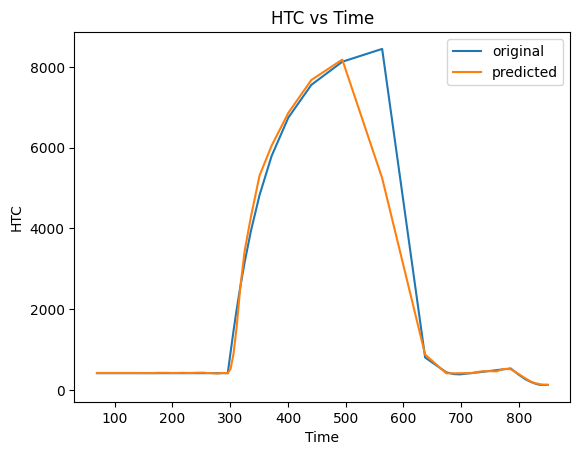

In [80]:


indx = 0
# x = np.arange(0, 120, 1)
x = x_train_unscaled[indx]
# print(x)
plt.plot(x, np.exp(y_train_log[indx]), label='original')
plt.plot(x, np.exp(model.predict(x_train[indx:indx+1])[0]), label='predicted')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Time")
plt.ylabel("HTC")
plt.title("HTC vs Time")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [81]:
y_train_pred_log = model.predict(x_train) 

28125/28125 [==============================] - 52s 2ms/step


In [82]:
y_train_pred_log

array([[4.82664  , 4.8309097, 4.8418484, ..., 6.0378904, 6.0378904,
        6.0378904],
       [5.9266925, 5.92714  , 5.9561996, ..., 5.8647447, 5.864744 ,
        5.8647447],
       [5.9409018, 5.9455485, 6.0373387, ..., 5.617916 , 5.617916 ,
        5.6179166],
       ...,
       [5.705916 , 5.7067785, 5.707866 , ..., 5.372569 , 5.372569 ,
        5.3725696],
       [5.9353805, 5.937969 , 5.9472446, ..., 5.496182 , 5.4961815,
        5.496182 ],
       [5.5558295, 5.556261 , 5.6426606, ..., 6.2191477, 6.2191477,
        6.219148 ]], dtype=float32)

In [84]:
from sklearn.metrics import mean_squared_error

In [85]:
mean_squared_error(y_train_log, y_train_pred_log)

0.005938076659876991

In [89]:
mse = mean_squared_error(y_train, np.exp(y_train_pred_log))

In [91]:
np.sqrt(mse)

266.44238876898925

In [87]:
y_train

array([[123.       , 123.       , 123.       , ..., 414.       ,
        414.       , 414.       ],
       [391.       , 391.       , 391.       , ..., 347.       ,
        347.       , 347.       ],
       [365.       , 365.       , 433.0650075, ..., 269.       ,
        269.       , 269.       ],
       ...,
       [318.       , 318.       , 318.       , ..., 216.       ,
        216.       , 216.       ],
       [376.       , 376.       , 376.       , ..., 242.       ,
        242.       , 242.       ],
       [268.       , 268.       , 268.       , ..., 491.       ,
        491.       , 491.       ]])

In [88]:
np.exp(y_train_pred_log)

array([[124.79098, 125.32492, 126.70332, ..., 419.00818, 419.00818,
        419.00818],
       [374.9124 , 375.08035, 386.13986, ..., 352.39215, 352.392  ,
        352.39215],
       [380.27768, 382.04886, 418.77707, ..., 275.31506, 275.31506,
        275.3152 ],
       ...,
       [300.64072, 300.90018, 301.2276 , ..., 215.41557, 215.41557,
        215.41566],
       [378.1838 , 379.16412, 382.69742, ..., 243.75946, 243.75935,
        243.75946],
       [258.74152, 258.85318, 282.2126 , ..., 502.27493, 502.27493,
        502.27518]], dtype=float32)